In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

plt.rcParams['font.family']='FangSong'
plt.rcParams['axes.unicode_minus']=False

# 这里就直接导入前几天做的颜色矩数据集

In [2]:
# 开始导入我们做好的特征数据集，进行数据集划分并建模
from sklearn.model_selection import  train_test_split
from sklearn import svm
from sklearn import metrics


data=pd.read_csv('./result.csv',encoding='utf-8')
data.head()

,水质类别,序号,R通道一阶矩,G通道一阶矩,B通道一阶矩,R通道二阶矩,G通道二阶矩,B通道二阶矩,R通道三阶矩,G通道三阶矩,B通道三阶矩
0,1.0,1.0,0.582761,0.543679,0.252429,0.014219,0.016178,0.041121,-0.012616,-0.016063,-0.041421
1,1.0,10.0,0.641878,0.570779,0.213561,0.015386,0.011118,0.013643,-0.009581,-0.003777,-0.003660
2,1.0,11.0,0.603720,0.576788,0.282187,0.008662,0.007072,0.012218,-0.004718,-0.002625,-0.009478
3,1.0,12.0,0.589708,0.593720,0.252203,0.007903,0.005937,0.010584,-0.003378,-0.003397,-0.005270
4,1.0,13.0,0.591129,0.592054,0.253430,0.007462,0.006502,0.012149,-0.001343,-0.002168,-0.004776


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 11 columns):
水质类别      203 non-null float64
序号        203 non-null float64
R通道一阶矩    203 non-null float64
G通道一阶矩    203 non-null float64
B通道一阶矩    203 non-null float64
R通道二阶矩    203 non-null float64
G通道二阶矩    203 non-null float64
B通道二阶矩    203 non-null float64
R通道三阶矩    203 non-null float64
G通道三阶矩    203 non-null float64
B通道三阶矩    203 non-null float64
dtypes: float64(11)
memory usage: 17.5 KB


In [4]:
#因为数据很小，为了增大数据区分度所以对X乘以30，避免过拟合
X=data.iloc[:,2:]*30
Y=data['水质类别']
Y=Y.astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
print(X_train.shape,X_test.shape)

(142, 9) (61, 9)


In [5]:
#混淆矩阵可视化
import seaborn as sns

def plot_confusion_matrix(confusion_mat):
    df_cm = pd.DataFrame(confusion_mat,index=[1,2,3,4,5],columns=[1,2,3,4,5])
    ax = sns.heatmap(df_cm,annot=True,fmt='.20g')
    ax.set_title('混淆矩阵')
    ax.set_xlabel('预测标签')
    ax.set_ylabel('真实标签')
    plt.show()

In [6]:
# 开始搭建神经网络
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten, BatchNormalization
from keras.optimizers import Adam


X_train = X_train.astype('float32').values.reshape(len(X_train),3,3,1)
X_test = X_test.astype('float32').values.reshape(len(X_test),3,3,1)

#因为类别不是从0开始编号，所以进行one-hot编码时减1
Y_train = np_utils.to_categorical(y_train-1)
Y_test = np_utils.to_categorical(y_test-1)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [11]:
model = Sequential()
model.add(Conv2D(6,6, strides=1, padding='same', input_shape=(3,3,1), activation='relu'))
model.add(AveragePooling2D(3,2, padding='same'))
model.add(BatchNormalization())
 
model.add(Conv2D(9,9, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(12,3, padding='same'))
model.add(Flatten())
 
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))


adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-8)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
print('Training')
result = model.fit(X_train, Y_train, epochs=50, batch_size=6,validation_split=0.1,shuffle=True)
 
print('Testing')
loss, accuracy = model.evaluate(X_test, Y_test)
print('loss, accuracy', loss, accuracy)

Training
Train on 127 samples, validate on 15 samples
Epoch 1/50
127/127 [==============================] - 0s 4ms/step - loss: 1.5788 - accuracy: 0.2992 - val_loss: 1.6052 - val_accuracy: 0.2000
Epoch 2/50
127/127 [==============================] - 0s 992us/step - loss: 1.4885 - accuracy: 0.4488 - val_loss: 1.5984 - val_accuracy: 0.2000
Epoch 3/50
127/127 [==============================] - 0s 1ms/step - loss: 1.3634 - accuracy: 0.6063 - val_loss: 1.5785 - val_accuracy: 0.6000
Epoch 4/50
127/127 [==============================] - 0s 1ms/step - loss: 1.2501 - accuracy: 0.6772 - val_loss: 1.5501 - val_accuracy: 0.4667
Epoch 5/50
127/127 [==============================] - 0s 1ms/step - loss: 1.1591 - accuracy: 0.6929 - val_loss: 1.5082 - val_accuracy: 0.4000
Epoch 6/50
127/127 [==============================] - 0s 1ms/step - loss: 1.0627 - accuracy: 0.7087 - val_loss: 1.4487 - val_accuracy: 0.4667
Epoch 7/50
127/127 [==============================] - 0s 1ms/step - loss: 0.9688 - accuracy:

In [12]:
# 预测测试集并把测试结果one-hot变为数字
cnn_pred=model.predict(X_test)
cnn_pred=np.argmax(cnn_pred,axis=1)+1

In [13]:
print('----------模型在测试集的结果-------')
test_acc=metrics.accuracy_score(y_test,cnn_pred)*100
test_cm=metrics.confusion_matrix(y_test,cnn_pred)
test_report=metrics.classification_report(y_test,cnn_pred)
print("测试集准确率为:%.f"%test_acc+"%")
print("-----------------")
print("测试集混淆矩阵:\n",test_cm)
print("-----------------")
print("测试集分类报告:\n",test_report)

----------模型在测试集的结果-------
测试集准确率为:93%
-----------------
测试集混淆矩阵:
 [[19  1  0  0  0]
 [ 0  8  0  0  0]
 [ 2  0 21  0  0]
 [ 0  0  0  9  0]
 [ 0  1  0  0  0]]
-----------------
测试集分类报告:
               precision    recall  f1-score   support

           1       0.90      0.95      0.93        20
           2       0.80      1.00      0.89         8
           3       1.00      0.91      0.95        23
           4       1.00      1.00      1.00         9
           5       0.00      0.00      0.00         1

    accuracy                           0.93        61
   macro avg       0.74      0.77      0.75        61
weighted avg       0.93      0.93      0.93        61



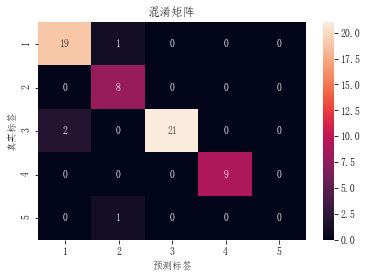

In [14]:
# 绘制混淆矩阵
plot_confusion_matrix(test_cm)

# 最后模型的结果准确率为93%,当然也尝试了其他网络模型以及数据增强，但是无奈读取整个图片的话总是处理不好过拟合问题，所以还是用的颜色矩。由于数据样本少所以网络一定不能太复杂，而且想过搭建多个简单网络从而变成一个强分类器，不过碍于时间问题还是没去实现。